In [189]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')


In [190]:
df = pd.read_csv("BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096
...,...,...,...,...,...,...,...
2282,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
2283,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2284,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2285,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765


In [191]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2.287000e+03
mean,4983.110223,5112.063808,4855.390235,4997.201017,4997.201017,9.405024e+09
std,4892.719309,5047.769597,4756.147525,4926.259324,4926.259324,1.332326e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,449.539993,454.794510,444.031998,449.511994,449.511994,6.511645e+07
50%,3913.047363,4000.486328,3845.821289,3915.714355,3915.714355,3.285460e+09
75%,8489.417969,8684.765137,8225.597657,8493.886231,8493.886231,1.573648e+10
max,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10


In [199]:
df[['Adj Close']].max() ,df[['Adj Close']].min()

(Adj Close    32782.023438
 dtype: float64,
 Adj Close    178.102997
 dtype: float64)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2287 non-null   object 
 1   Open       2287 non-null   float64
 2   High       2287 non-null   float64
 3   Low        2287 non-null   float64
 4   Close      2287 non-null   float64
 5   Adj Close  2287 non-null   float64
 6   Volume     2287 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 125.2+ KB


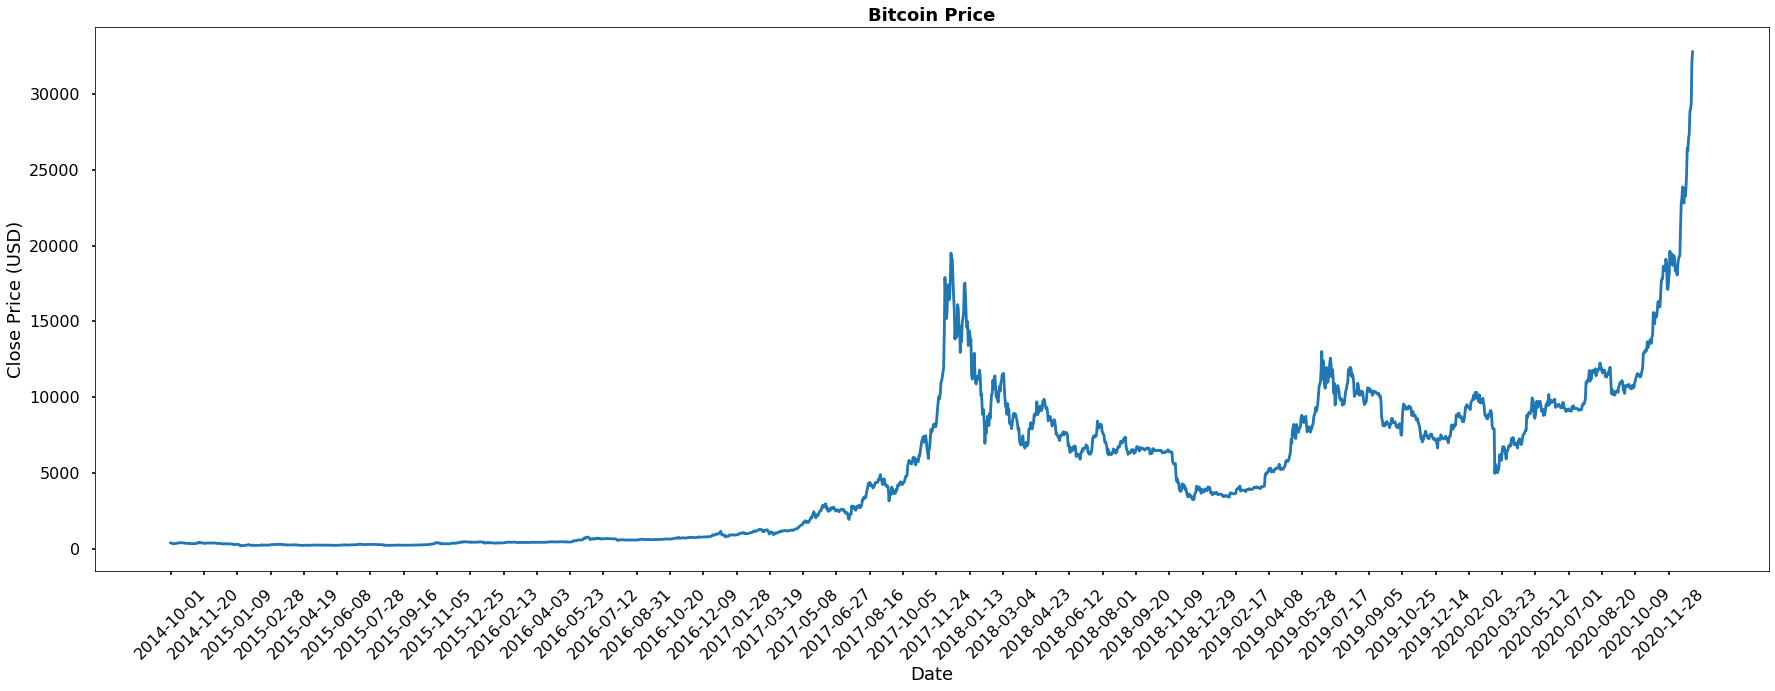

In [193]:
ultimoPreco = df[['Close']]
plt.figure(figsize = (30,10))
plt.plot(ultimoPreco)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [194]:
data_training = df[df['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096
...,...,...,...,...,...,...,...
1913,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996
1914,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026
1915,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702
1916,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672


Normalizacao dos dados

In [195]:
data_test = df[df['Date']> '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1919,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
1920,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
1921,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
1922,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
1923,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598
...,...,...,...,...,...,...,...
2282,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
2283,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2284,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2285,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765


In [196]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,387.427002,391.378998,380.779999,383.614990,26229400
1,383.988007,385.497009,372.946014,375.071991,21777700
2,375.181000,377.695007,357.859009,359.511993,30901200
3,359.891998,364.487000,325.885986,328.865997,47236500
4,328.915985,341.800995,289.295990,320.510010,83308096


In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.09089097e-02, 9.03786104e-03, 1.11298501e-02, 1.06376536e-02,
        4.50441501e-04],
       [1.07307133e-02, 8.74194569e-03, 1.07132062e-02, 1.01954533e-02,
        3.51733787e-04],
       [1.02743658e-02, 8.34943694e-03, 9.91081643e-03, 9.39004107e-03,
        5.54029501e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])